In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cvxpy as cp
import scipy as sp

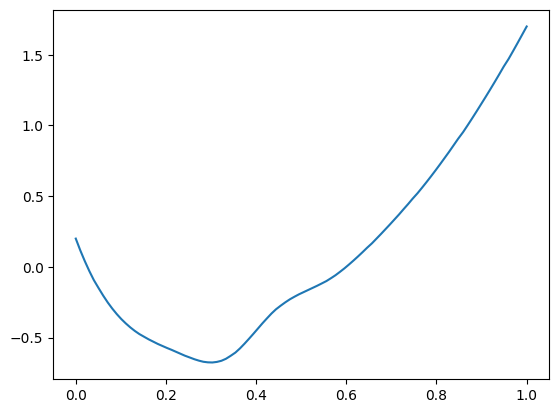

In [3]:
import numpy as np

x = np.array([0.000, 0.010, 0.020, 0.030, 0.040, 0.051, 0.061, 0.071, 0.081, 0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.152, 0.162, 0.172, 0.182, 0.192, 0.202, 0.212, 0.222, 0.232, 0.242, 0.253, 0.263, 0.273, 0.283, 0.293, 0.303, 0.313, 0.323, 0.333, 0.343, 0.354, 0.364, 0.374, 0.384, 0.394, 0.404, 0.414, 0.424, 0.434, 0.444, 0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535, 0.545, 0.556, 0.566, 0.576, 0.586, 0.596, 0.606, 0.616, 0.626, 0.636, 0.646, 0.657, 0.667, 0.677, 0.687, 0.697, 0.707, 0.717, 0.727, 0.737, 0.747, 0.758, 0.768, 0.778, 0.788, 0.798, 0.808, 0.818, 0.828, 0.838, 0.848, 0.859, 0.869, 0.879, 0.889, 0.899, 0.909, 0.919, 0.929, 0.939, 0.949, 0.960, 0.970, 0.980, 0.990, 1.000])
y = np.array([0.200, 0.117, 0.041, -0.029, -0.093, -0.152, -0.204, -0.252, -0.295, -0.334, -0.369, -0.400, -0.428, -0.453, -0.475, -0.495, -0.513, -0.529, -0.545, -0.559, -0.573, -0.586, -0.600, -0.614, -0.628, -0.641, -0.653, -0.663, -0.671, -0.675, -0.676, -0.672, -0.664, -0.650, -0.630, -0.606, -0.577, -0.544, -0.509, -0.473, -0.436, -0.399, -0.364, -0.330, -0.300, -0.273, -0.250, -0.229, -0.211, -0.194, -0.179, -0.164, -0.149, -0.134, -0.118, -0.100, -0.080, -0.059, -0.035, -0.010, 0.017, 0.045, 0.074, 0.104, 0.135, 0.167, 0.200, 0.233, 0.267, 0.301, 0.336, 0.371, 0.408, 0.444, 0.482, 0.521, 0.560, 0.600, 0.641, 0.683, 0.726, 0.770, 0.814, 0.860, 0.906, 0.953, 1.001, 1.050, 1.100, 1.151, 1.202, 1.254, 1.307, 1.361, 1.416, 1.471, 1.527, 1.584, 1.642, 1.700])

plt.plot(x, y)


In [30]:
# Create a function which given x, y and x_find finds the corresponding y value using interpolation
def interpolate(x, y, x_find):
    # Find the index of the first element in x which is larger than x_find
    index = np.searchsorted(x, x_find)
    # If x_find is larger than all elements in x, return the last element in y
    if index == len(x):
        return y[-1]
    # If x_find is smaller than all elements in x, return the first element in y
    if index == 0:
        return y[0]
    # If x_find is between two elements in x, interpolate between the corresponding elements in y
    return y[index - 1] + (y[index] - y[index - 1]) / (x[index] - x[index - 1]) * (x_find - x[index - 1])

    

### Fitting a convex function to data

status: optimal


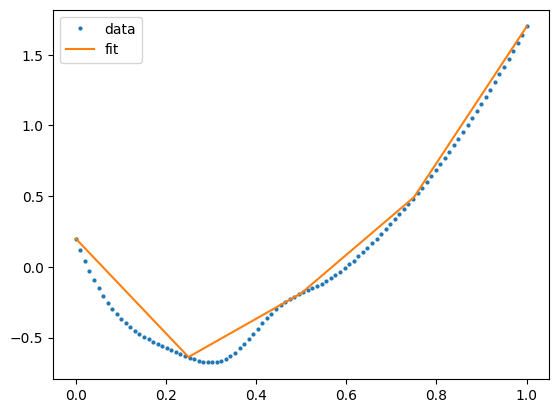

In [42]:
u_tilde = np.linspace(0, 1, 5)
y_tilde = np.array([interpolate(x, y, u_i) for u_i in u_tilde])

y_hat = cp.Variable(y_tilde.shape[0])
g = cp.Variable(y_tilde.shape[0])

objective = cp.sum_squares(y_tilde - y_hat)
constraints = [] 
#constraints = [ g >= 0] #Results in a monotone non-decreasing function

for j in range(1, y_tilde.shape[0]):
    i = j - 1   
    constraints.append(y_hat[j] >= y_hat[i] + g[i] * (u_tilde[j] - u_tilde[i]))

prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve()
print("status:", prob.status)

plt.plot(x, y, 'o', markersize=2, label='data')
plt.plot(u_tilde, y_hat.value, label='fit')
plt.legend()
plt.show()

### Fitting a non-decreasing convex function

status: optimal


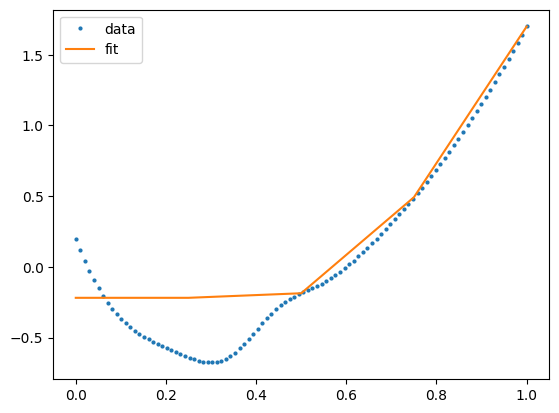

In [40]:
u_tilde = np.linspace(0, 1, 5)
y_tilde = np.array([interpolate(x, y, u_i) for u_i in u_tilde])

y_hat = cp.Variable(y_tilde.shape[0])
g = cp.Variable(y_tilde.shape[0])

objective = cp.sum_squares(y_tilde - y_hat) 
constraints = [ g >= 0] #Results in a monotone non-decreasing function

for j in range(1, y_tilde.shape[0]):
    i = j - 1   
    constraints.append(y_hat[j] >= y_hat[i] + g[i] * (u_tilde[j] - u_tilde[i]))

prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve()
print("status:", prob.status)

plt.plot(x, y, 'o', markersize=2, label='data')
plt.plot(u_tilde, y_hat.value, label='fit')
plt.legend()
plt.show()